<p style = "font-family: Arial; font-size:1.75em;color:blue;font-size:bold">
    Statistical Inference: Are mean YouTube views in the US and UK significantly different? 
    <br>
</p>    

[YouTube Dataset link](https://www.kaggle.com/datasnaek/youtube)

* $\mu_1$ = mean number of US YouTube views
* $\mu_2$ = mean number of UK YouTube views



* Null hypothesis,       $H_0$: $\mu_1 - \mu_2 = 0$
* Alternative hypotheis, $H_1$: $\mu_1 - \mu_2 \neq 0$
* Confidence level, $\alpha$ = 5%

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import glob

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)


#### load US dataset

In [2]:
us_video_cols = ["video_id","title","channel_title","category_id","tags","views","likes","dislikes","comment_total","thumbnail_link","date"]
df_us_video = pd.read_csv("Data_youtube/USvideos.csv", usecols=us_video_cols, sep=',', low_memory=False)
print("Shape of the dataframe: ", df_us_video.shape)
print()
print("First three rows of the dataframe:\n ", df_us_video.head(3))
print()
print("\nColumn names:\n ", df_us_video.columns)

Shape of the dataframe:  (7998, 11)

First three rows of the dataframe:
        video_id                                                          title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED YOUTUBE FOREVER!   
1  K4wEI5zhHB0                        iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                                    My Response   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   

                                                                                                  tags  \
0  logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|pa...   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|F...   
2                                                                                               [none]   

     views   likes  dislikes  c

#### load UK dataset

In [3]:
uk_video_cols = ["video_id","title","channel_title","category_id","tags","views","likes","dislikes","comment_total","thumbnail_link","date"]
df_uk_video = pd.read_csv("Data_youtube/GBvideos.csv", usecols=us_video_cols, sep=',', low_memory=False)
print("Shape of the UK video dataframe: ", df_uk_video.shape)
print()
print("First three rows of the UK video dataframe:\n ", df_uk_video.head(3))
print()
print("\nColumn names of UK video dataframe:\n ", df_us_video.columns)

Shape of the UK video dataframe:  (7995, 11)

First three rows of the UK video dataframe:
        video_id  \
0  jt2OHQh0HoQ   
1  AqokkXoa7uE   
2  YPVcg45W0z4   

                                                                                        title  \
0  Live Apple Event - Apple September Event 2017 - iPhone 8, iPhone X, iOS 11 - Apple Keynote   
1                                Holly and Phillip Meet Samantha the Sex Robot | This Morning   
2                                                             My DNA Test Results! I'm WHAT?!   

  channel_title  category_id  \
0   Apple Event           28   
1  This Morning           24   
2  emmablackery           24   

                                                                                                  tags  \
0             apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11   
1  this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat show...   

In [4]:
print("Basic statistics of US YouTube views:\n ")
print(df_us_video["views"].describe())

Basic statistics of US YouTube views:
 
count    7.998000e+03
mean     9.391016e+05
std      2.147691e+06
min      0.000000e+00
25%      9.690000e+04
50%      3.086115e+05
75%      9.595132e+05
max      4.150067e+07
Name: views, dtype: float64


In [5]:
print("Basic statistics of UK YouTube views:\n ")
print(df_uk_video["views"].describe())

Basic statistics of UK YouTube views:
 
count    7.995000e+03
mean     1.110467e+06
std      3.048405e+06
min      0.000000e+00
25%      1.082980e+05
50%      3.150910e+05
75%      9.710280e+05
max      5.896141e+07
Name: views, dtype: float64


C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


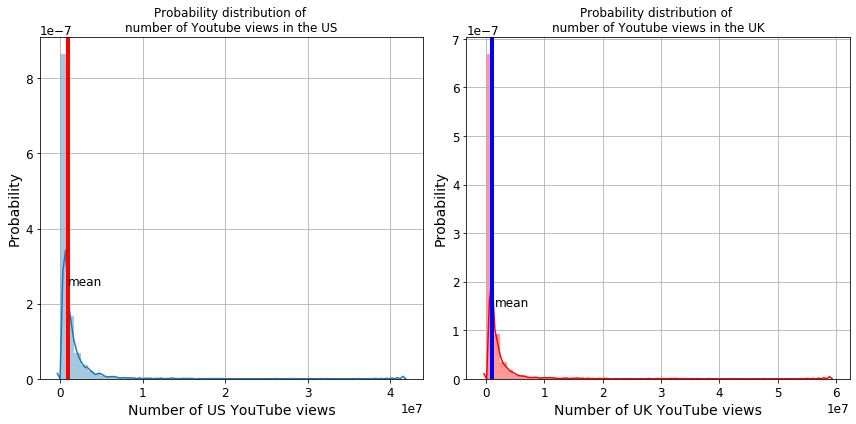

In [6]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.distplot(df_us_video.views, hist=True, kde=True, ax = ax1)
plt.axvline(x=9.39*1e5, color='r', linewidth=4)
plt.text(x=9.90*1e5, y=2.5*1e-7, s="mean", fontsize=12)
ax1.set_xlabel("Number of US YouTube views")
ax1.set_title("Probability distribution of \nnumber of Youtube views in the US")
ax1.set_ylabel("Probability")
ax1.grid(True)

ax2 = fig.add_subplot(122)
sns.distplot(df_uk_video.views, hist=True, kde=True, ax = ax2, color='r')
plt.axvline(x=1.11*1e6, color='blue', linewidth=4)
plt.text(x=1.50*1e6, y=1.5*1e-7, s="mean", fontsize=12)
ax2.set_title("Probability distribution of \nnumber of Youtube views in the UK")
ax2.set_xlabel("Number of UK YouTube views")
ax2.set_ylabel("Probability")
ax2.grid(True)
plt.tight_layout()

* We observe that distribution of both US and UK views are right-skewed. 
* Few YouTube videos are virul with extermley high number of views.
* The mean number of views in the US is 939,102; while the mean number of views in the UK is 1,110,467.
* As there are some extreme number of views, standard deviation of both distribuitions are very high.
* For the sake of simplicity, we assume that these two distributions are independent. No YouTube views in the UK affect the viewers in the US. This assumption, though, is not perfectly true.  

#### Procedure for the hypothesis test

* (i) Randomly choose independent samples from the US views and find the mean.
* (ii) Randomly choose independent samples from the UK views and find the mean.
* (iii) Take the mean difference of these two independent random samples.
* (iv) Repeat steps (i) to (iii) for a number of trials. Because of the central limit theorem, we will have a normal distribution of sample mean differences.
* (v) Find the 95% confidence interval of this normal distribution and see whether the mean difference of '0' falls inside the interval or outside the interval. 
* (vi) If '0' falls outside the interval, we reject the null hypothesis that the mean number of views in the US and UK are not significantly difference.

In [7]:
sampleSize = 3000
numTrials = 10000

In [8]:
import random

#### Some helper functions

In [9]:
def choose_random_samples(num_views, sampleSize=2000):
    '''
    num_views: set of number of views from either US or UK
    sampleSize: we choose a random sample with a sampleSize
    
    return: randomly chosen number of views of sampleSize
    '''
    return random.sample(num_views, k = sampleSize)


def sample_mean_diff(us_sample, uk_sample):
    '''
    This function returns the mean difference between the US and UK views
    '''
    return np.mean(us_sample) - np.mean(uk_sample)

def sample_std_dev(sample):
    '''
    This function returns std. dev. of a sample
    '''
    return np.std(sample)

In [10]:
us_views = df_us_video.views
uk_views = df_uk_video.views

#### Run the simulation

In [11]:
def simulate_mean_diff(numTrials, sampleSize, us_views, uk_views):
    '''
    numTrials: number of iterations we find mean differences
    sampleSize: sample size, say 2000 or 3000
    us_views: number of US views
    uk_views: number of UK views
    
    return: a list of mean diffrences
    '''
        
    mean_diff_list = []
    
    for i in range(numTrials):
        
        us_sample = choose_random_samples(set(us_views), sampleSize)
        uk_sample = choose_random_samples(set(uk_views), sampleSize)
        
        mean_diff = sample_mean_diff(us_sample, uk_sample)
        
        mean_diff_list.append(mean_diff)
        
    return mean_diff_list

In [12]:
mean_diff_sample = simulate_mean_diff(numTrials, sampleSize, us_views, uk_views)

In [13]:
mean_of_sample_mean_diff = np.mean(mean_diff_sample)
std_dev_of_sample_mean_diff = np.std(mean_diff_sample)

print("\nThe mean of sample mean differences: {}\n".format(round(mean_of_sample_mean_diff,2))) 
print("\nThe std. dev. of sample mean differences: {}\n".format(round(std_dev_of_sample_mean_diff,2)))


The mean of sample mean differences: -170996.15


The std. dev. of sample mean differences: 53124.13



In [14]:
confidence_interval_right_end = mean_of_sample_mean_diff + 1.96*std_dev_of_sample_mean_diff
confidence_interval_left_end = mean_of_sample_mean_diff - 1.96*std_dev_of_sample_mean_diff
print("\n95% confidence interval of the mean differnce is between {} and {}\n".format(round(confidence_interval_left_end,2), \
                                                                                  round(confidence_interval_right_end, 2)))


95% confidence interval of the mean differnce is between -275119.44 and -66872.87



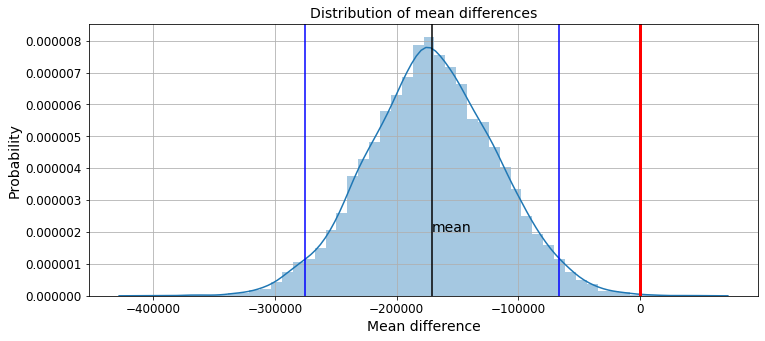

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(mean_diff_sample)
plt.axvline(x=0, color='r', linewidth=3)
plt.axvline(x=confidence_interval_left_end, color='b')
plt.axvline(x=confidence_interval_right_end, color='b')
plt.axvline(x=mean_of_sample_mean_diff, color='k')
plt.text(x=mean_of_sample_mean_diff, y = 0.000002, s = "mean", fontsize=14)
plt.title("Distribution of mean differences", fontsize = 14)
plt.xlabel("Mean difference")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

#### Conclusion:

* From the above figure, we observe that mean difference of 0 is outside the 95% confidence internal and falls into the zone of rejection of the null hypothesis.
* **We conclude that the mean number of views in the US and UK are statistically significant at 5% confidence level.**


* Negative differnce shows that number of Us views are less than the number of UK views. 
* Recall we assume $\mu_1$ is the mean number of US views and $\mu_2$ is the mean number of UK views, and $H_0$: $\mu_1 - \mu_2 = 0$.